In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 '''In the dataset we can see there is some problem  in data ,
Glucose, bloodpresure,skinthockness,BMI  can't be zero'''

In [7]:
df['BMI']= df.BMI.replace(0,df.BMI.mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df.BloodPressure.mean())
df['Glucose']=df.Glucose.replace(0,df.Glucose.mean())
df['Insulin']=df.Insulin.replace(0,df.Insulin.mean())
df['SkinThickness']=df.SkinThickness.replace(0,df.Insulin.mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,55.609189,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,41.803319,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,35.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,118.660163,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,118.660163,846.000000,67.100000,2.420000,81.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


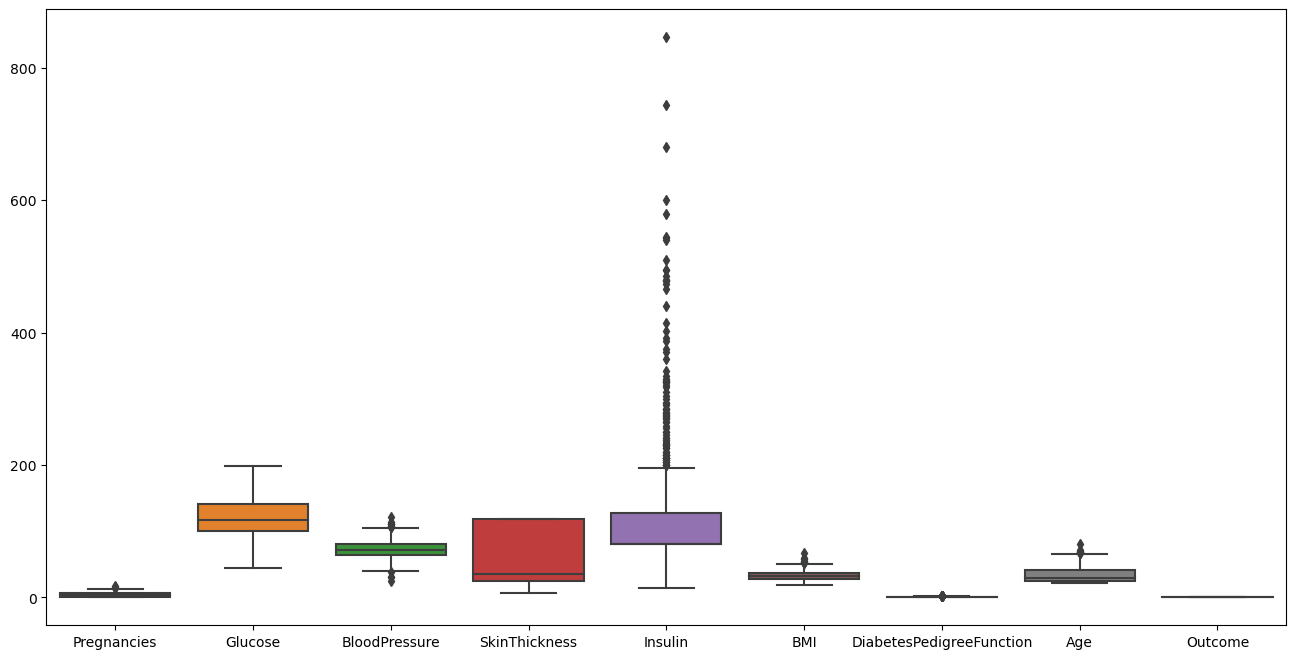

In [9]:
plt.figure(figsize=(16,8))
sns.boxplot(df)
plt.show()

In [10]:
def outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))

    return df

In [11]:
df['Insulin'] = outliers_IQR(df['Insulin'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


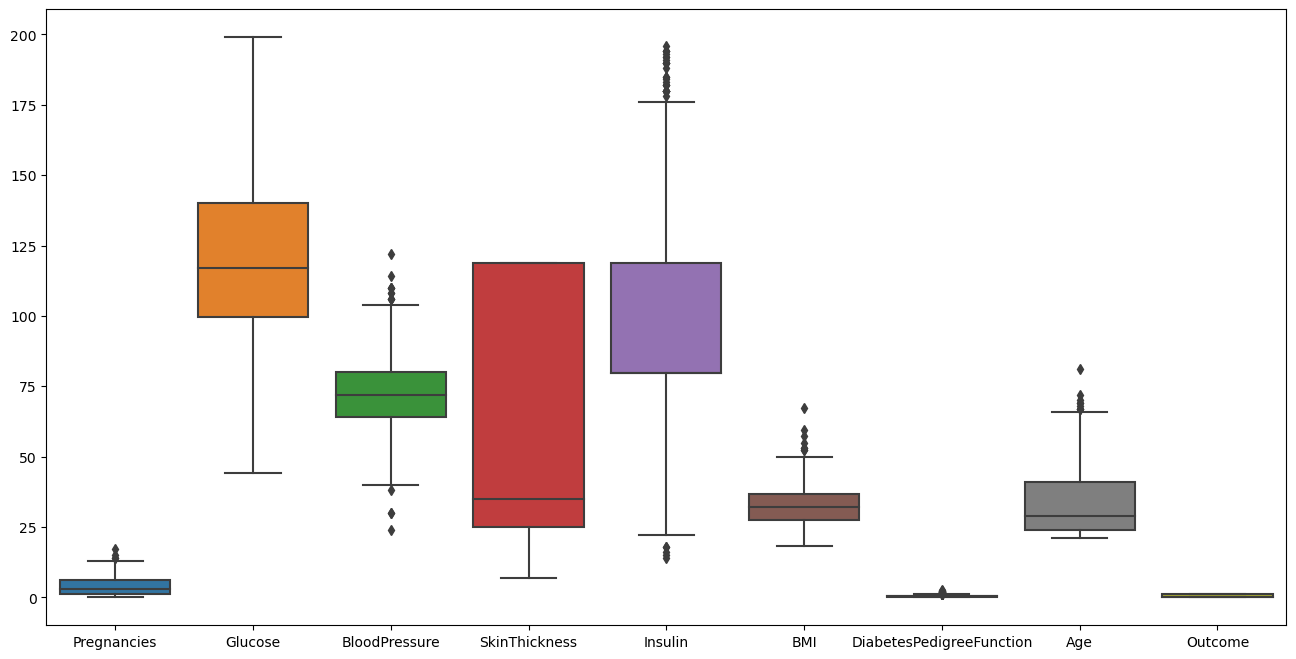

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(df)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Now we scan see clearly insuline,BMI,AGE,Bloodpresure and pregnanci has outliers,but insulin ha much more than others

(array([0.06510417, 0.03407118, 0.01996528, 0.01866319, 0.01128472,
        0.00737847, 0.00564236, 0.00347222, 0.00086806, 0.00021701]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

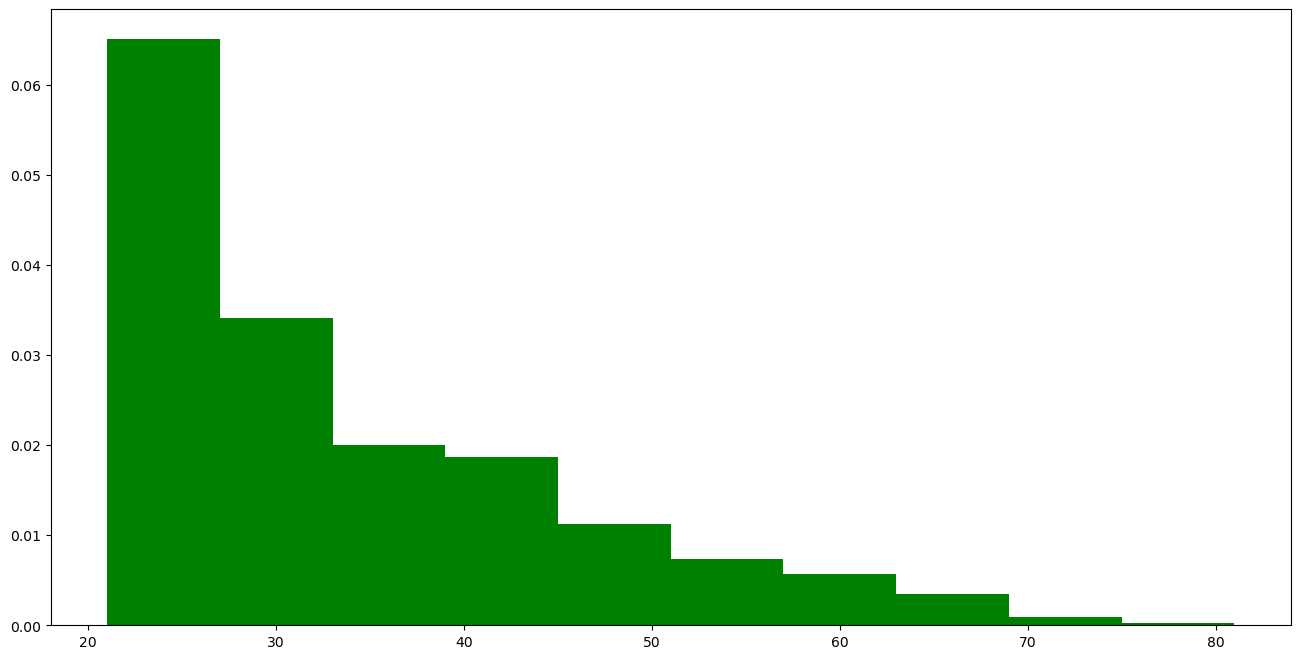

In [14]:
plt.figure(figsize=(16,8))
plt.hist(x=df.Age,density=True,color=['Green'])


In [15]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0bcb0aa650>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Dibatic'),
  Text(0.5025944158780503, -0.9784676045369114, 'Non-Dibatic')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

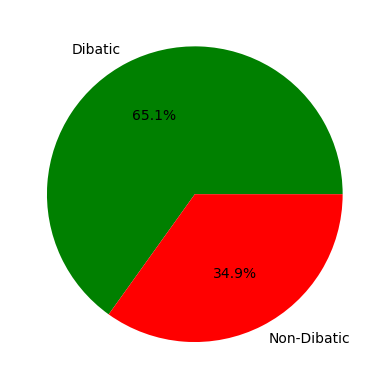

In [16]:
plt.pie(df.Outcome.value_counts(),autopct='%1.1f%%',labels=['Dibatic','Non-Dibatic'],colors=['g','r'],data=df)

In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.166719,0.003334,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.077388,0.308500,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.140440,-0.016443,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.166719,0.077388,0.140440,1.000000,-0.261840,0.017085,-0.129068,0.242977,0.096703
Insulin,0.003334,0.308500,-0.016443,-0.261840,1.000000,0.159955,0.141074,0.041029,0.190386
BMI,0.021546,0.231478,0.281231,0.017085,0.159955,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,-0.129068,0.141074,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.242977,0.041029,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.096703,0.190386,0.312254,0.173844,0.238356,1.000000


<AxesSubplot: >

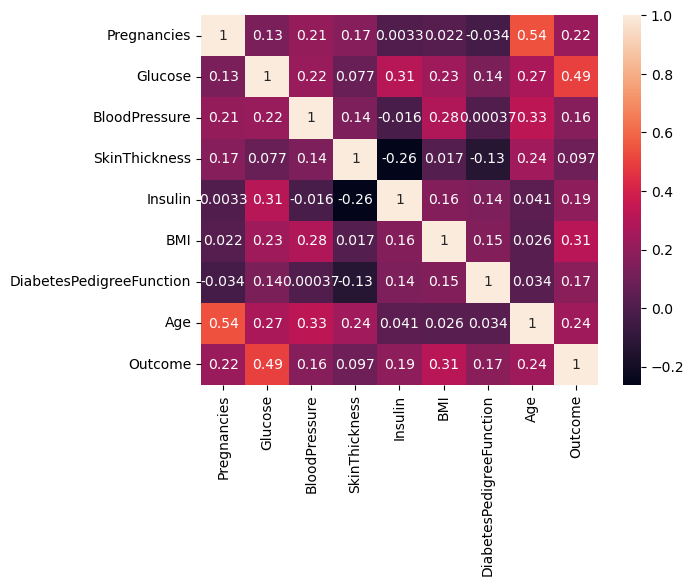

In [18]:
sns.heatmap(df.corr(),annot=True)

# In the data set all features are not highly co-related

# train test split

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,118.660163,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [20]:
# Dependend and Independen variables
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [21]:
x.shape

(768, 8)

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape


((537, 8), (231, 8))

In [25]:
y_train.shape,y_test.shape

((537,), (231,))

# Model Traning

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [27]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=classifier.predict(x_test)

In [29]:
# perfomance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.6753246753246753
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       136
           1       0.62      0.53      0.57        95

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.67      0.68      0.67       231

[[106  30]
 [ 45  50]]


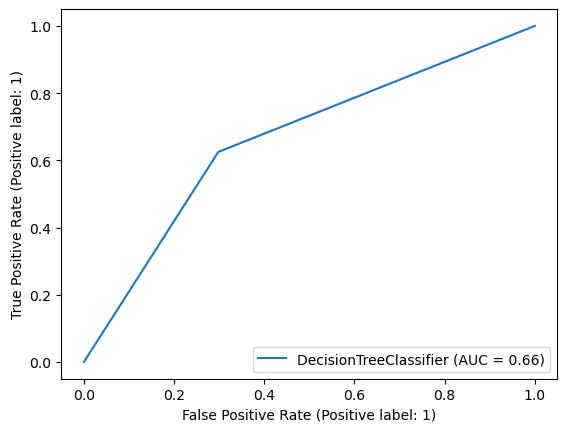

In [30]:
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(classifier,x_test,y_test)
plt.show()

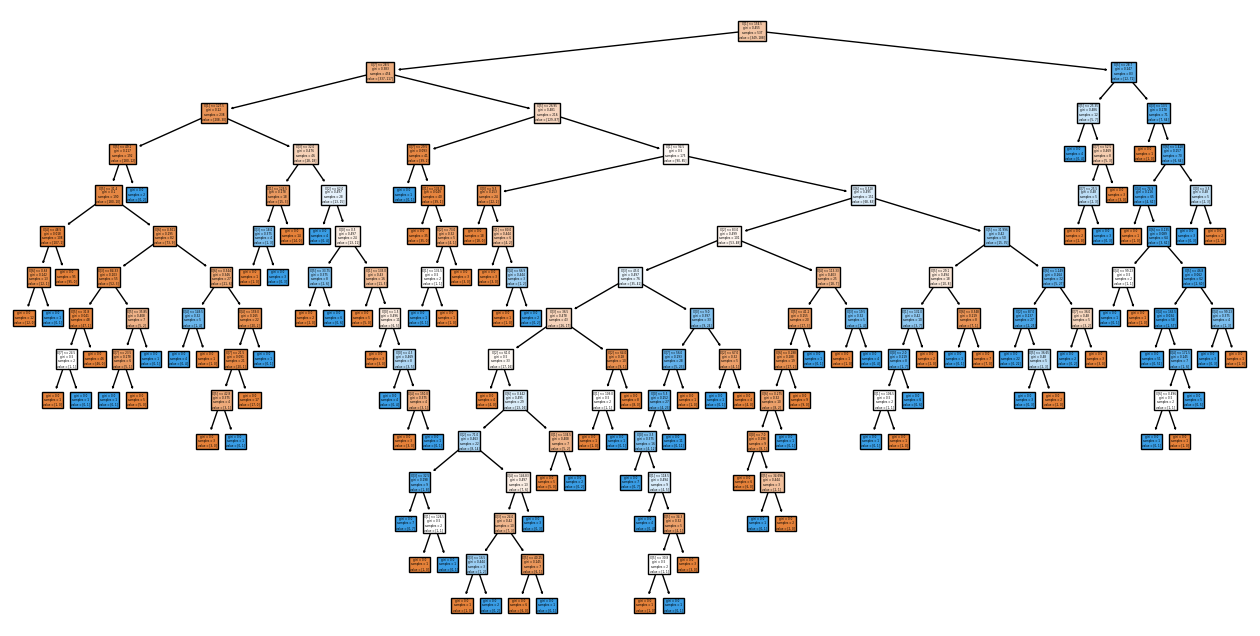

In [31]:
from sklearn import tree 
plt.figure(figsize=(16,8))
tree.plot_tree(classifier,filled=True)
plt.show()

In [32]:
# post pouring
classifier_p=DecisionTreeClassifier(max_depth=7)

In [33]:
classifier_p.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

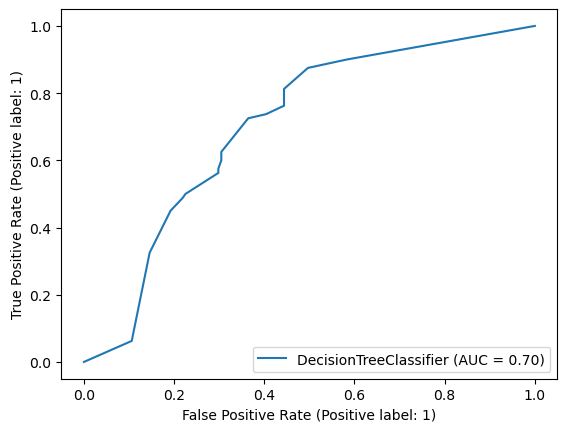

In [34]:
roc_disp = RocCurveDisplay.from_estimator(classifier_p,x_test,y_test)
plt.show()

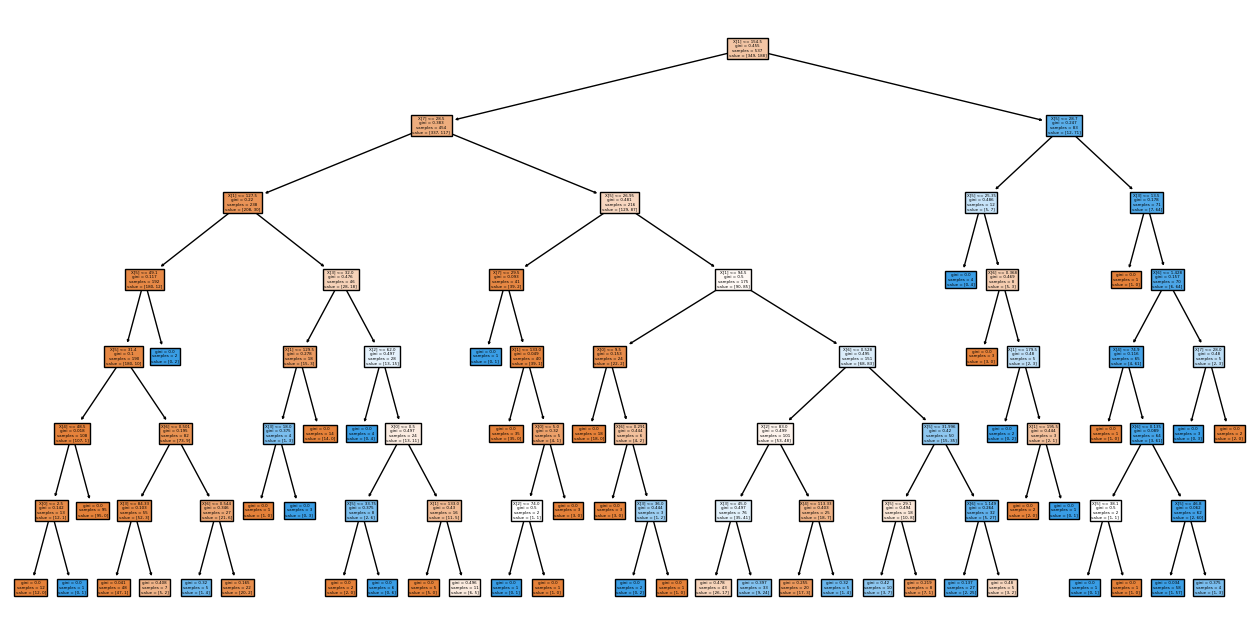

In [35]:
plt.figure(figsize=(16,8))
tree.plot_tree(classifier_p,filled=True)
plt.show()

In [36]:
y_pred_p=classifier_p.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_p,y_test))
print(classification_report(y_pred_p,y_test))

0.658008658008658
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       140
           1       0.57      0.51      0.54        91

    accuracy                           0.66       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.65      0.66      0.65       231



# Hyperparameter Tuning

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']

}

grid=GridSearchCV(classifier_p,param_grid=parameter,cv=5,scoring='accuracy')

In [41]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=7),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [43]:
grid.best_score_

0.7540844582900658

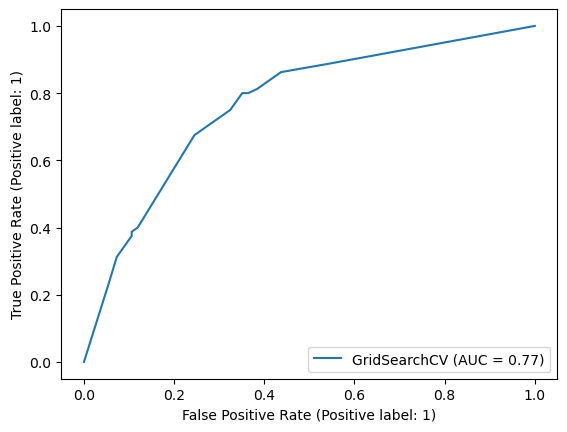

In [44]:
roc_disp = RocCurveDisplay.from_estimator(grid,x_test,y_test)
plt.show()

In [45]:
y_pred_g=grid.predict(x_test)

In [46]:
# pradiction
print(accuracy_score(y_pred_g,y_test))
print(classification_report(y_pred_g,y_test))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       140
           1       0.68      0.59      0.63        91

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.72      0.73      0.72       231

